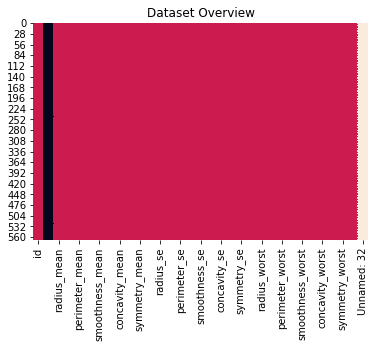

 Categerocial   Numeric   NaN 


In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
## for explainer


dtf = pd.read_csv('data.csv')
dtf.head()

def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
    

dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")
    
    

In [2]:
dtf = dtf.set_index("id")
dtf = dtf.rename(columns={"diagnosis":"Y"})

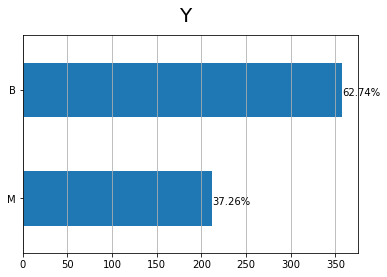

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


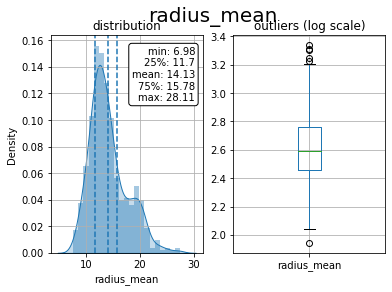

In [3]:
y = "Y"
ax = dtf[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

x = "radius_mean"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


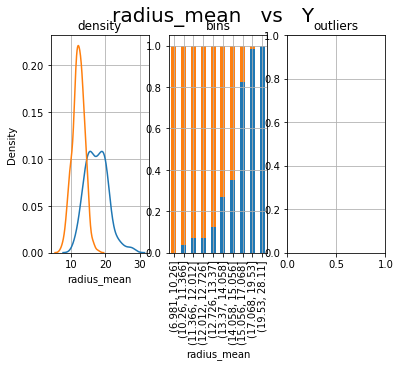

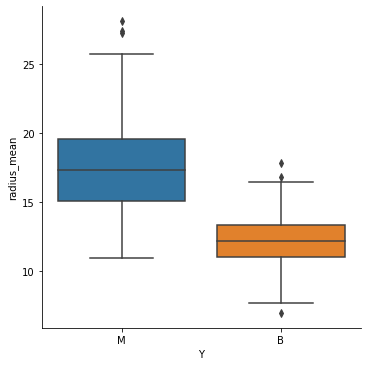

In [4]:
cat, num = "Y", "radius_mean"

fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


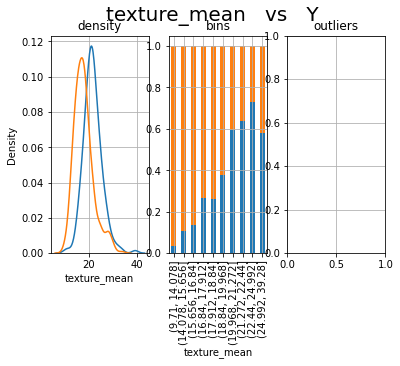

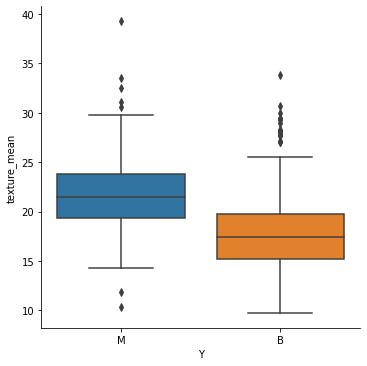

Shapiro-Wilk: the variables are Non-Normal (p-value: 1.1376855187095192e-11)
4.058636047899219e-25
Anova F: the variables are Correlated (p-value: 0.0)


In [5]:
### il y a clairement une influence de la variable radius mean on peut donc dire qu'elle sera potentiellement prédictive
import scipy.stats as stats
def predictive(cat1,num1):
    

    fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
    fig.suptitle(num1+"   vs   "+cat1, fontsize=20)
            
### distribution
    ax[0].title.set_text('density')
    for i in dtf[cat1].unique():
        sns.distplot(dtf[dtf[cat1]==i][num1], hist=False, label=i, ax=ax[0])
    ax[0].grid(True)
### stacked
    ax[1].title.set_text('bins')
    breaks = np.quantile(dtf[num1], q=np.linspace(0,1,11))
    tmp = dtf.groupby([cat1, pd.cut(dtf[num1], breaks, duplicates='drop')]).size().unstack().T
    tmp = tmp[dtf[cat1].unique()]
    tmp["tot"] = tmp.sum(axis=1)
    for col in tmp.drop("tot", axis=1).columns:
         tmp[col] = tmp[col] / tmp["tot"]
    tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
    ax[2].title.set_text('outliers')
    sns.catplot(x=cat1, y=num1, data=dtf, kind="box", ax=ax[2])
    ax[2].grid(True)
    plt.show()
    model = smf.ols(num1+' ~ '+cat1, data=dtf).fit()
    w,p1= stats.shapiro(model.resid)
    conclusion1 = "Non-Normal" if p1 < 0.05 else "Normal"
    print("Shapiro-Wilk: the variables are", conclusion1, "(p-value: "+str(p1)+")")
    table = sm.stats.anova_lm(model)
    p = table["PR(>F)"][0]
    print(p)
    coeff, p = None, round(p, 4)
    conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
    print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")
    
predictive("Y","texture_mean")
    

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


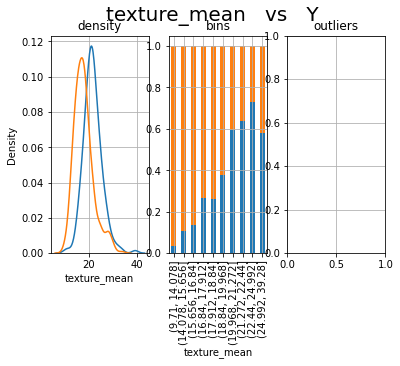

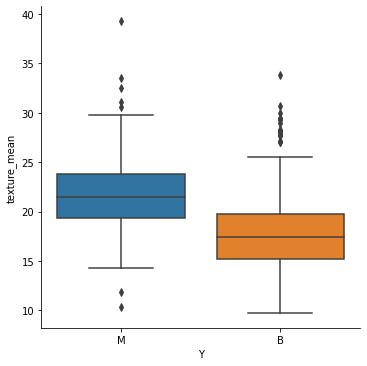

Shapiro-Wilk: the variables are Non-Normal (p-value: 1.1376855187095192e-11)
4.058636047899219e-25
Anova F: the variables are Correlated (p-value: 0.0)


In [71]:
predictive("Y","texture_mean")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


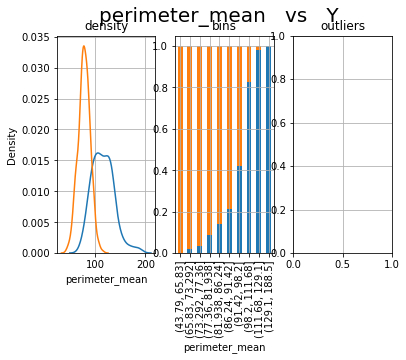

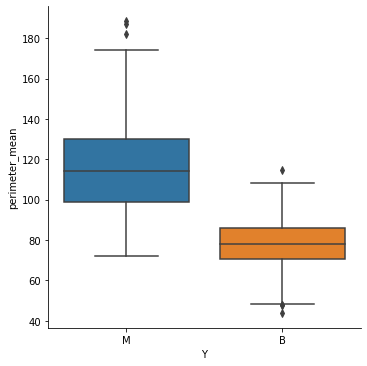

Shapiro-Wilk: the variables are Non-Normal (p-value: 5.137187386594633e-08)
8.436251036175388e-101
Anova F: the variables are Correlated (p-value: 0.0)


In [45]:
predictive("Y","perimeter_mean")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


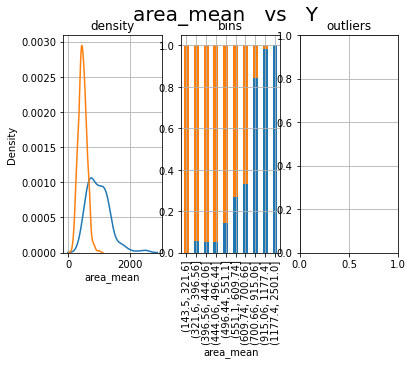

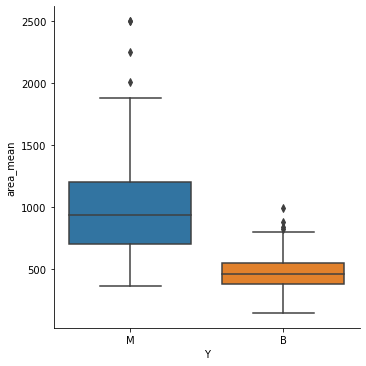

Shapiro-Wilk: the variables are Non-Normal (p-value: 3.08260667407033e-17)
4.7345643103086664e-88
Anova F: the variables are Correlated (p-value: 0.0)


In [46]:
predictive("Y","area_mean")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


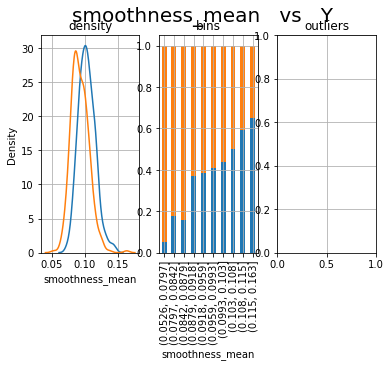

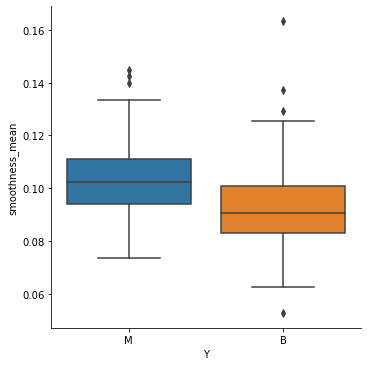

1.051850359203294e-18
Anova F: the variables are Correlated (p-value: 0.0)


In [39]:
predictive("Y","smoothness_mean")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


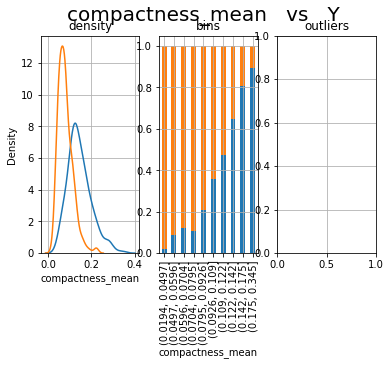

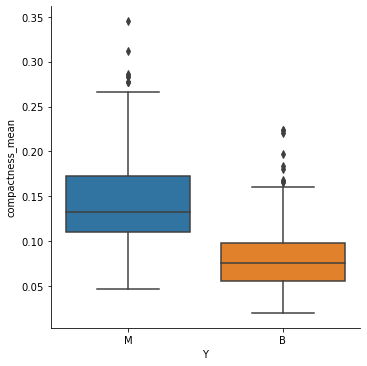

Shapiro-Wilk: the variables are Non-Normal (p-value: 1.2352094444934708e-13)
3.9382631058877807e-56
Anova F: the variables are Correlated (p-value: 0.0)


In [83]:
predictive("Y","compactness_mean")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


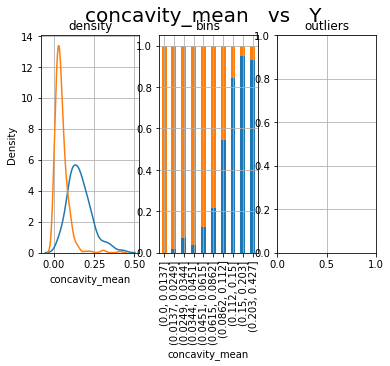

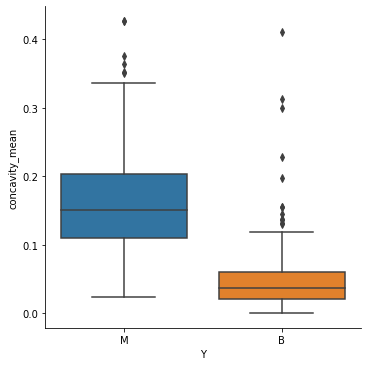

9.966555755074321e-84
Anova F: the variables are Correlated (p-value: 0.0)


In [41]:
predictive("Y","concavity_mean")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


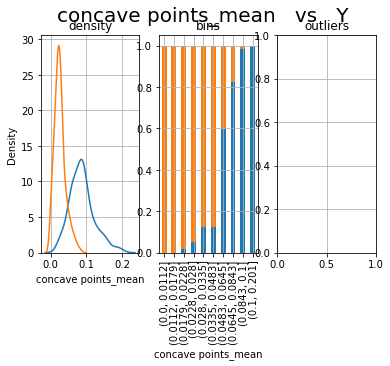

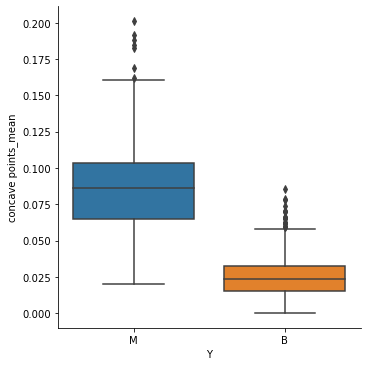

SyntaxError: invalid syntax (<unknown>, line 1)

In [33]:
predictive("Y","concave points_mean")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


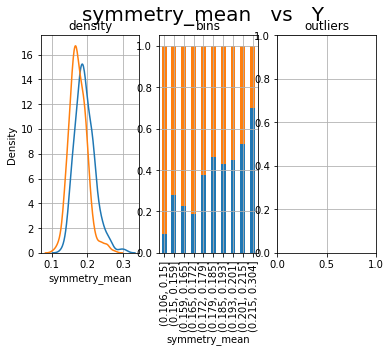

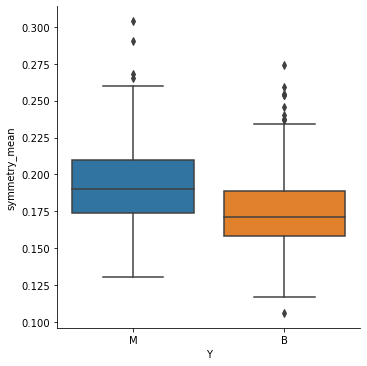

Shapiro-Wilk: the variables are Non-Normal (p-value: 4.428356348284979e-09)
5.733384028468135e-16
Anova F: the variables are Correlated (p-value: 0.0)


In [48]:
predictive("Y","symmetry_mean")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


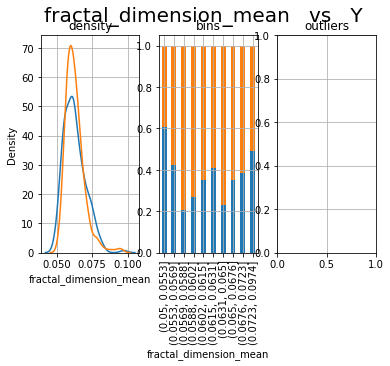

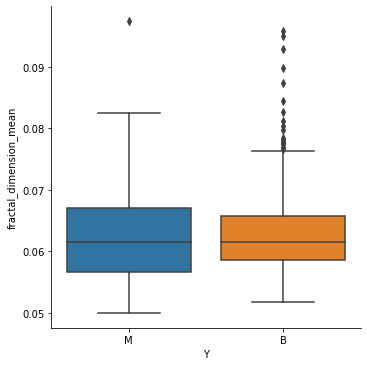

Anova F: the variables are Correlated (p-value: 0.0)


In [23]:
predictive("Y","fractal_dimension_mean")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


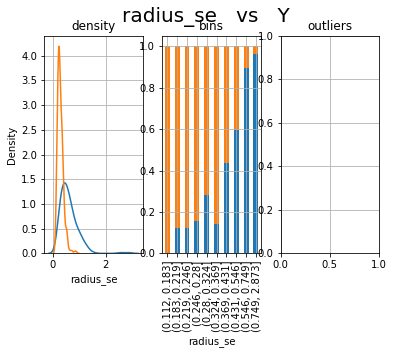

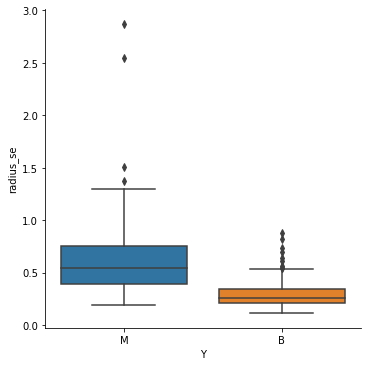

Anova F: the variables are Correlated (p-value: 0.0)


In [24]:
predictive("Y","radius_se")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


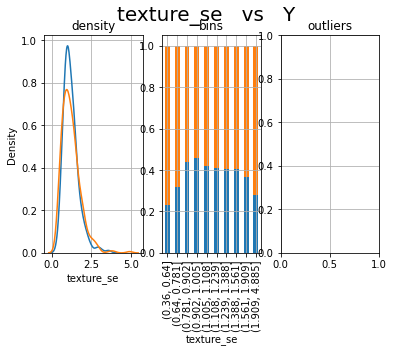

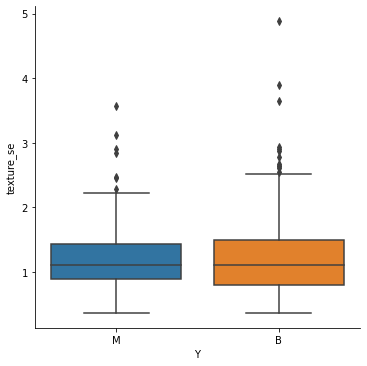

Shapiro-Wilk: the variables are Non-Normal (p-value: 4.0270354959015616e-19)
0.8433320287670788
Anova F: the variables are Non-Correlated (p-value: 0.8433)


In [49]:
predictive("Y","texture_se")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


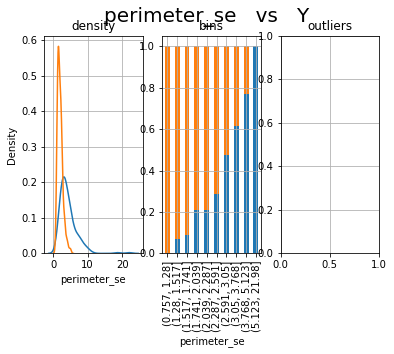

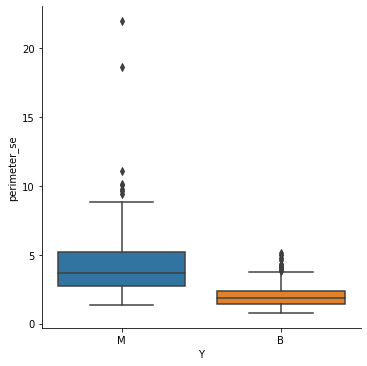

Shapiro-Wilk: the variables are Non-Normal (p-value: 6.450740570609718e-28)
1.6519051758501927e-47
Anova F: the variables are Correlated (p-value: 0.0)


In [50]:
    predictive("Y","perimeter_se")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


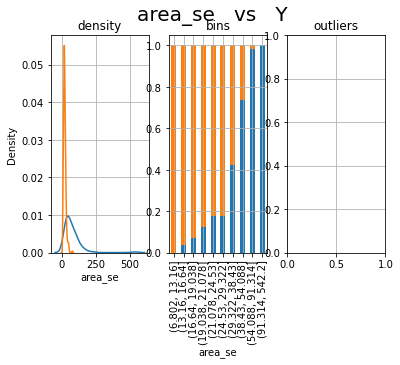

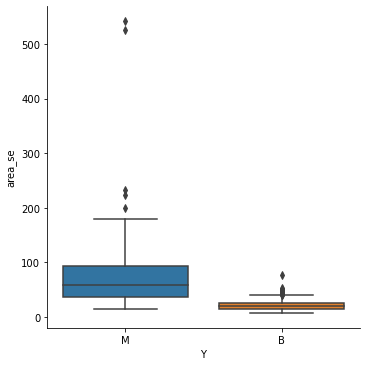

Shapiro-Wilk: the variables are Non-Normal (p-value: 5.072907285961637e-35)
5.895521392606798e-46
Anova F: the variables are Correlated (p-value: 0.0)


In [51]:
predictive("Y","area_se")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


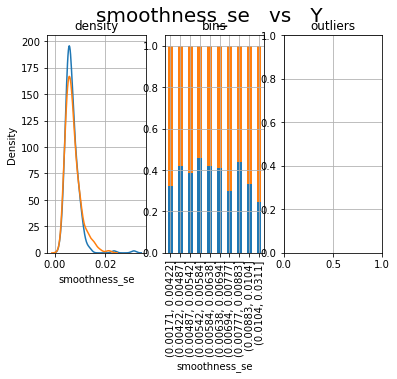

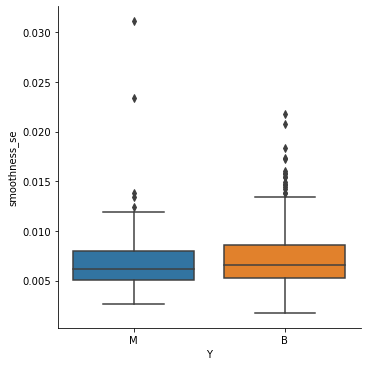

Shapiro-Wilk: the variables are Non-Normal (p-value: 2.1475840420931905e-23)
0.11029660865790443
Anova F: the variables are Non-Correlated (p-value: 0.1103)


In [52]:
predictive("Y","smoothness_se")

C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\halil\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


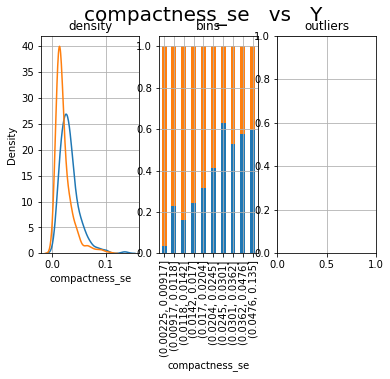

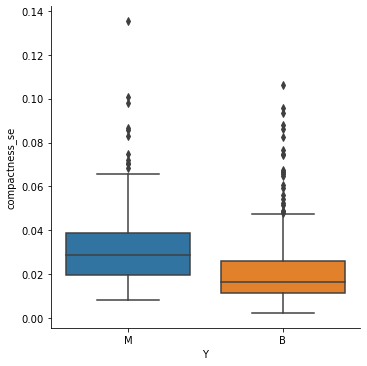

Shapiro-Wilk: the variables are Non-Normal (p-value: 1.6465097911240038e-24)
9.97599465407606e-13
Anova F: the variables are Correlated (p-value: 0.0)


In [77]:
predictive("Y","compactness_se")

In [6]:
# on va garder seulement les variables les plus différentes visuellement et si possible par la suite réussir les test stat , on va passer au preprocessing
# des datas l'objectif est de les préparer pour pouvoir faire le model de ML , je pense faire différent model avec différente variable et voir 
# le model ML qui donne les meilleure résultats ensuite 

## data preprocessing

# 1 chaque obervation doit se trouver sur une seule ligne c'est déjà OK dans notre cas 
# 2 il faut partitionner les données en un ensemble d'entrainement et un ensemble de test 

# pour pouvoir bien partitionner ses données il faut que les données présente dans l'ensemble d'entrainement ne se retrouve pas dans l'ensemble test
## split data
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.3)

print(dtf_train)
## print info
#dtf_train.drop("id",axis=1)
#dtf_test.drop("id",axis=1)
print("X_train shape:", dtf_train.shape, "| X_test shape:", dtf_test.shape)

Y_train= dtf_train["Y"]      
print(Y_train)
Y_test= dtf_test["Y"]

           Y  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                   
901028     B       13.870         16.21           88.52      593.7   
861597     B       12.360         21.80           79.78      466.1   
86561      B       13.850         17.21           88.44      588.7   
8912049    M       19.160         26.60          126.20     1138.0   
88206102   M       20.510         27.81          134.40     1319.0   
...       ..          ...           ...             ...        ...   
911391     B       10.880         15.62           70.41      358.9   
88147102   B       15.000         15.51           97.45      684.5   
875938     M       13.770         22.29           90.63      588.9   
871642     B       10.660         15.15           67.49      349.6   
901034301  B        9.436         18.32           59.82      278.6   

           smoothness_mean  compactness_mean  concavity_mean  \
id                       

           radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                
901028        0.326045      0.219817        0.309101   0.190965   
861597        0.254579      0.408860        0.248704   0.136840   
86561         0.325098      0.253635        0.308548   0.188844   
8912049       0.576412      0.571187        0.569484   0.421845   
88206102      0.640305      0.612107        0.626149   0.498621   
...                ...           ...             ...        ...   
911391        0.184533      0.199865        0.183954   0.091368   
88147102      0.379526      0.196145        0.370811   0.229480   
875938        0.321312      0.425431        0.323682   0.188929   
871642        0.174121      0.183970        0.163776   0.087423   
901034301     0.116191      0.291173        0.110773   0.057306   

           smoothness_mean  compactness_mean  concavity_mean  \
id                                                             


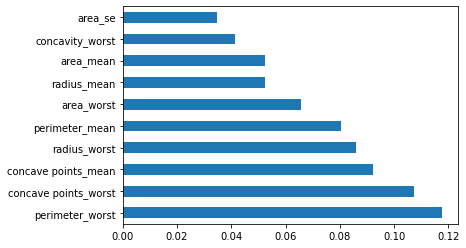

In [7]:
# 3 on vérifie si il n'y a pas de valeurs manquante dans nos données ici c'est OK
# 4 on va rescaler nos données entre 0 et 1 de sorte à ce que l'algo puisse calculer plus rapidement

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_train= scaler.fit_transform(dtf_train.drop(["Y","Unnamed: 32"], axis=1))
dtf_scaled_train= pd.DataFrame(X_train, columns=dtf_train.drop(["Y","Unnamed: 32"], axis=1).columns, index=dtf_train.index)
X_train2= dtf_scaled_train
print(X_train2)
#dtf_scaled_train["Y"] = dtf_train["Y"]
dtf_scaled_train.head()

X_test=scaler.fit_transform(dtf_test.drop(["Y","Unnamed: 32"], axis=1))
dtf_scaled_test= pd.DataFrame(X_test, columns=dtf_test.drop(["Y","Unnamed: 32"], axis=1).columns, index=dtf_test.index)
#dtf_scaled_test["Y"] = dtf_test["Y"]
dtf_scaled_test.head()

# feature selection
model_selec= ExtraTreesClassifier()
model_selec.fit(X_train2,Y_train)
print(model_selec.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_selec.feature_importances_, index=X_train2.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [8]:
# maintenant que nos données sont prêtes, je vais sélectionner des variables d'intérêt pour ensuite construire mon model, pour cela nous allons voir
# si il y a des variables qui sont corrélées entre elle ou des variables qui sont plus puissante pour séparer les malins des bénins dans un nuage de point 
# alors on va privilégié ces variables afin de construire notre model ML par la suite 
X_names = ["area_mean", "concavity_worst", "radius_mean", "area_worst", "concavity_mean", "perimeter_mean",
"perimeter_worst", "radius_worst", "concave points_mean", "concave points_worst"]
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

print(X_train)

[[5.937e+02 5.285e-02 1.387e+01 ... 1.511e+01 2.088e-02 5.556e-02]
 [4.661e+02 2.434e-01 1.236e+01 ... 1.383e+01 3.745e-02 1.205e-01]
 [5.887e+02 8.115e-02 1.385e+01 ... 1.549e+01 1.141e-02 5.104e-02]
 ...
 [5.889e+02 3.809e-01 1.377e+01 ... 1.639e+01 6.526e-02 1.673e-01]
 [3.496e+02 0.000e+00 1.066e+01 ... 1.154e+01 0.000e+00 0.000e+00]
 [2.786e+02 1.144e-01 9.436e+00 ... 1.202e+01 1.406e-02 5.052e-02]]


In [9]:
print(y_train)
print(y_test)


['B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'B'
 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B

In [10]:
#58% de B dans l'ensemble test
#Model de machine learning design 
## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=100, 
       scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

Best Model parameters: {'subsample': 0.85, 'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 4, 'max_depth': 7, 'learning_rate': 0.01}
Best Model mean accuracy: 0.9497151898734177


In [11]:
## train
model.fit(X_train, y_train)
## test
#predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)

# evaluation 

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
#auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
#print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted,pos_label='B')
precision = metrics.precision_score(y_test, predicted,pos_label='B')
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.95
Recall (all 1s predicted right): 0.97
Precision (confidence when predicting a 1): 0.95
Detail:
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       105
           M       0.95      0.92      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



ModuleNotFoundError: No module named 'lime'

In [14]:
pip install lime 

Note: you may need to restart the kernel to use updated packages.Collecting lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=a96a81c5e50253b59f2b924f9e7085fd2f3557f98d5f63985e04b7a6f7c1111b
  Stored in directory: c:\users\halil\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [21]:
from lime import lime_tabular
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)

In [38]:
print("True:", y_test[28], "--> Pred:", predicted[28], "| Prob:", np.max(predicted_prob[28]))

True: M --> Pred: M | Prob: 0.7673959518992152


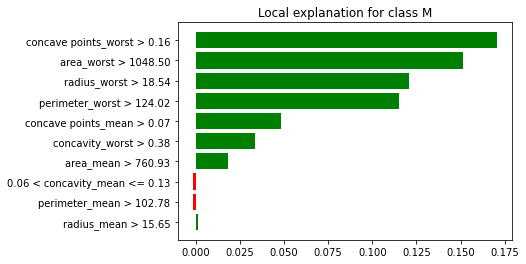

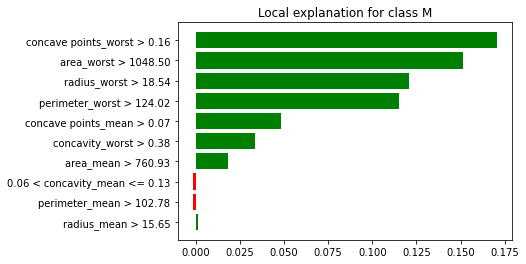

In [39]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names=np.unique(y_train), mode="classification")
explained = explainer.explain_instance(X_test[28], model.predict_proba, num_features=10)
explained.as_pyplot_figure()

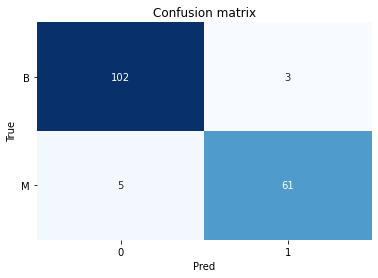

In [40]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()